# CS5131 Assignment 3

## Information
**Problem description:** Placeholder

**Objective:** Placeholder

**Team members:** Li Yi Cheng (M20503) and Ranen Chow (M20504)

**Methodology:** Supervised learning

**Category:** Regression and Classification

**Data:** [pH Recognition Data from Kaggle](https://www.kaggle.com/robjan/ph-recognition)

## Import Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from math import sqrt

# Add any other libraries you are importing here later

## Read Data

In [4]:
df = pd.read_csv("ph-data.csv") # Place the csv file IN THE SAME FOLDER as this file
df.head()

,blue,green,red,label
0,36,27,231,0
1,36,84,250,1
2,37,164,255,2
3,22,205,255,3
4,38,223,221,4


In [5]:
df.describe(include='all')

,blue,green,red,label
count,653.000000,653.000000,653.000000,653.000000
mean,89.290965,130.094946,120.655436,7.055130
std,74.974850,72.487085,89.581264,4.287951
min,0.000000,0.000000,0.000000,0.000000
25%,22.000000,68.000000,52.000000,3.000000
50%,67.000000,146.000000,90.000000,7.000000
75%,162.000000,189.000000,224.000000,11.000000
max,255.000000,255.000000,255.000000,14.000000


## Exploratory Data Analysis (EDA)

## Data Visualisation

<function matplotlib.pyplot.show(*args, **kw)>

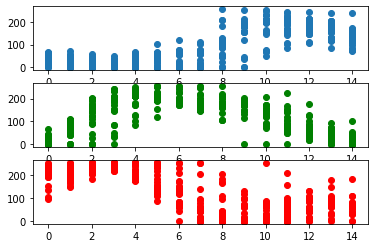

In [16]:
fig, ax = plt.subplots(3)
ax[0].scatter(df.label,df.blue)
ax[1].scatter(df.label,df.green,color='green')
ax[2].scatter(df.label,df.red,color='red')

plt.show

## Splitting Data for Training and Testing

In [13]:
X = df.drop('label', axis=1).values
y = df['label'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

## Testing Different Machine Learning (ML) Models
Since the problem can be formulated as a classification problem or a regression problem, we try both classification models and regression models.

### Classification Models

#### K-Nearest Neighbors Classification

First, we try different k-values.

In [38]:
k_range = range(1, 26)
uniform_accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    uniform_accuracy_scores.append(accuracy_score(y_pred, y_test))

We plot a graph using matplotlib to compare accuracy between different K values.

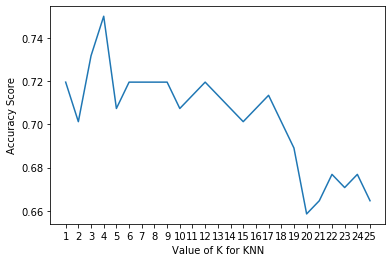

In [39]:
plt.plot(k_range, uniform_accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(1, 26))  # makes x-axis values integers
plt.show()

It appears that a k value of 4 produces the highest accuracy.

Secondly, we try changing the weights function to 'distance'. This means that the model will "weight points by the inverse of their distance.... closer neighbors of a query point will have a greater influence than neighbors which are further away." (Source: [sklearn.neighbors.KNeighborsClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier))

The models made above used a uniform (the default) weights function.

In [43]:
k_range = range(1, 26)
distance_accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    distance_accuracy_scores.append(accuracy_score(y_pred, y_test))
    
print(distance_accuracy_scores)

[0.7195121951219512, 0.7195121951219512, 0.725609756097561, 0.7439024390243902, 0.7378048780487805, 0.7439024390243902, 0.7378048780487805, 0.7378048780487805, 0.7378048780487805, 0.7439024390243902, 0.7439024390243902, 0.7439024390243902, 0.7439024390243902, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.7560975609756098, 0.7439024390243902, 0.7439024390243902, 0.7439024390243902, 0.7439024390243902, 0.7439024390243902]


Once again, we plot a graph using matplotlib to compare accuracy between different K values.

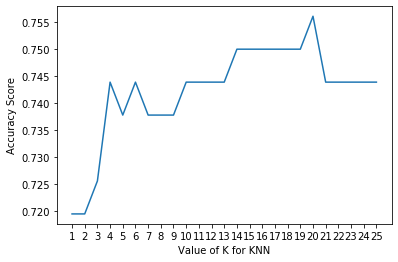

In [37]:
plt.plot(k_range, distance_accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(1, 26))  # makes x-axis values integers
plt.show()

This time, it appears that $k=20$ produces the best accuracy score.

### Regression Models

#### Model A (Change to name of model you are using e.g. K-Nearest Neighbors)

In [100]:
pH = df.label[:,np.newaxis]
blue = df.blue[:,np.newaxis]
green = df.green[:,np.newaxis]
red = df.red[:,np.newaxis]


polynomialfeatures = PolynomialFeatures(degree = 6)
blue = polynomialfeatures.fit_transform(blue)
green = polynomialfeatures.fit_transform(green)
red = polynomialfeatures.fit_transform(red)

blue_train, blue_test, pH_blue_train, pH_blue_test = train_test_split(blue,pH,test_size=0.2)
green_train, green_test, pH_green_train, pH_green_test = train_test_split(blue,pH,test_size=0.2)
red_train, red_test, pH_red_train, pH_red_test = train_test_split(blue,pH,test_size=0.2)


bluemodel = LinearRegression()
bluemodel.fit(blue_train,pH_blue_train)
pH_blue_predict = bluemodel.predict(blue_test)

greenmodel = LinearRegression()
greenmodel.fit(green_train,pH_green_train)
pH_green_predict = greenmodel.predict(green_test)

redmodel = LinearRegression()
redmodel.fit(red_train,pH_red_train)
pH_red_predict = redmodel.predict(red_test)

bluermse = np.sqrt(mean_squared_error(pH_blue_test,pH_blue_predict))
bluer2 = r2_score(pH_blue_test,pH_blue_predict)

greenrmse = np.sqrt(mean_squared_error(pH_green_test,pH_green_predict))
greenr2 = r2_score(pH_green_test,pH_green_predict)

redrmse = np.sqrt(mean_squared_error(pH_red_test,pH_red_predict))
redr2 = r2_score(pH_red_test,pH_red_predict)

print ("Blue root mean squared error: " + str(bluermse))
print ("Blue r squared value: " + str(bluer2))
print ("Green root mean squared error: " + str(greenrmse))
print ("Green r squared value: " + str(greenr2))
print ("Red root mean squared error: " + str(redrmse))
print ("Red r squared value: " + str(redr2))

Blue root mean squared error: 2.357004788349705
Blue r squared value: 0.7078191346130529
Green root mean squared error: 2.1709547041184734
Green r squared value: 0.7234077460984585
Red root mean squared error: 1.9151131346254275
Red r squared value: 0.7888690009046369


In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2.2131188622185234


## Final Model